In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('/content/customer_churn_prediction_dataset.csv')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [15]:
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df._get_numeric_data().mean(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [16]:
df_encoded = pd.get_dummies(df.drop('Churn', axis=1))
X = df_encoded
y = df['Churn']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.52      0.62      0.57        48
           1       0.44      0.33      0.38        42

    accuracy                           0.49        90
   macro avg       0.48      0.48      0.47        90
weighted avg       0.48      0.49      0.48        90



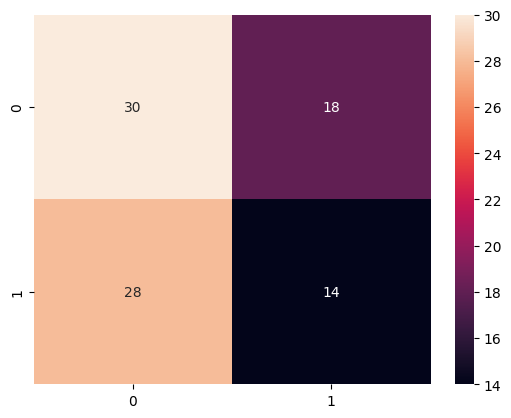

In [19]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [9]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.2 MB/s eta 0:00:00


In [20]:
import eli5
from eli5.sklearn import PermutationImportance


In [21]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0333 ± 0.0314,Partner_No
0.0222 ± 0.0344,DeviceProtection_No internet service
0.0178 ± 0.0573,Contract_Two year
0.0178 ± 0.0518,TechSupport_No
0.0178 ± 0.0555,StreamingTV_No internet service
0.0178 ± 0.0387,OnlineSecurity_No internet service
0.0156 ± 0.0301,PaymentMethod_Electronic check
0.0156 ± 0.0109,gender_Female
0.0156 ± 0.0109,MultipleLines_No phone service
0.0133 ± 0.0218,Contract_Month-to-month


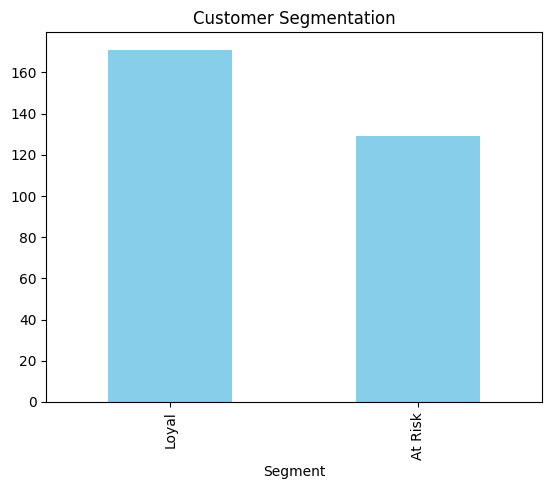

In [22]:
df['Prediction'] = model.predict(X)
df['Segment'] = df['Prediction'].map({1: 'At Risk', 0: 'Loyal'})
df['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.show()
